# **Universal Scaling Law in War**

#### **Elaborado por:**
- **Nicolás Acero Vargas**
- **Juan Francisco Gutiérrez Cortés**
- **Juan Manuel Segura Guatibonza**
- **Andrés Silva Vásquez**

#### **Presentado a:**
- **William Fernando Oquendo Patiño**

#### **Departamento de Física, Universidad Nacional de Colombia**
#### **Herramientas computacionales (2016661)**

## Instalación comando py-heat-magic

In [ ]:
pip install py-heat-magic

In [ ]:
%load_ext heat

The heat extension is already loaded. To reload it, use:
  %reload_ext heat


## Primer Código iteraciones

En este código se trabaja sobre el array cuyos elementos son la fuerza de ataque de cada una de las unidades de ataque, siendo que el tamaño de este array cambia.

In [ ]:
%%heat -o Profiling.png

import numpy as np
from tqdm import tqdm

# Función de fraccionamiento
def fracc(n):
    DistF = n / np.sum(n)  # ----> Distribución de probabilidad para escoger el frente
    i = np.random.choice(np.arange(len(n)), p=DistF)   # ----> Escoge un frente basado en la ponderación

    if n[i] > 1:                                       # ----> Solo fraccionar si el frente tiene al menos fuerza 2
        nuevos = np.ones(n[i], dtype=int)              # ----> Crea `n[i]` frentes de valor 1
        n = np.concatenate((n[:i], n[i + 1:], nuevos)) # ----> Concatenar eliminando el frente i

    return n

# Función de combinación
def comn(n):
    DistF = n / np.sum(n)  # ----> Distribución de probabilidad para escoger los frentes
    i, j = np.random.choice(np.arange(len(n)), size=2, p=DistF) # ----> Escoge dos frentes basados en la ponderación

    while j == i:
        j = np.random.choice(np.arange(len(n)), p=DistF) # ----> Asegurarse de que i y j sean distintos

    n[i] += n[j]         # ----> Combina las fuerzas de los frentes
    n = np.delete(n, j)  # ----> Elimina uno de los frentes combinados

    return n

# Función
def simulacion(N, m , v):
    # N: Fuerza de ataque total
    # m: Número de iteraciones
    # v: Probabilidad de fragmentación

    ns = np.random.randint(1, N)                # ----> Número aleatorio entre 1 y N de unidades de ataque
    dist = np.random.multinomial(N, [1/ns]*ns)  # ----> Distribución aleatoria inicial
    dist = dist[dist > 0]                       # ----> Filtra valores mayores que cero

    # Realizar las m iteraciones considerando probabilidad de fraccionamiento y combinación
    for i in tqdm(range(m), desc="Processing", unit="iteration"):
      if np.random.rand() > v and len(dist) > 1:  # ----> Verifica que la unidad de ataque sea mayor que v y que la distribución sea mayor que 1
        dist = comn(dist)                         # ----> Si se cumplen ambas condiciones la unidad se combina
      else:
        dist = fracc(dist)                        # ----> Si no se cumple algunas de las condiciones la unidad se fracciona

    return dist

# Declaración de parámetros y llamado de la función
N, m, v = 100000, 100000, 0.01
dist = simulacion(N, m, v)

# Guardar en un archivo de texto
np.savetxt('resultado final.txt', dist)

# Imprimir la distribución final y la suma final
print("Distribución final:", dist)
print("Suma final:", np.sum(dist))

Processing: 100%|██████████| 100000/100000 [01:21<00:00, 1228.92iteration/s]
/usr/local/lib/python3.10/dist-packages/pyheat/pyheat.py:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(row_labels, minor=False)


Distribución final: [ 1  1  1  1  1  3  2  1  2  1  1  1  1  1  2  1  1  7  1  1  1  1  1  1
  1  1  1  1  2  1  5  1  1  1  3  1  2  1  4  1  1  1  1  2  2  1  1  1
  1  2  1  1  1  1  1  1  1  1  4  4  1  3  1  2  2  6  1  2  9  1  1  2
  1  1  1  1  2  9  1  1  1  2  1  1  1  1  1  1  2  1  1  1  1  1  1  1
  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  2  4  3  3  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  4  1  1  3  1  1  2  1  1  1  1  1  1  1  2  1  3  1  1  1  1  1  1  2
  1  1  1  1  1  1  1  1  2  3  1  1  3  2  1  1  2  2  3  1  1  1  1  1
  1  1  4  1  1  5  1  3  1  1  1  2  1  3  1  1  1  1  2  3  1  1  1  5
  4  1  2  1  1  6  1  1  1  1  8  3  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  3  2  1  1  1  2  1  1  2  1  5  1  1  1  7  1  1  1  2
  6  1  1  1  2  2  1  5  1  1  1  1  1  1  6  1  1  1  1  1  2  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 24  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 

### Graficación

In [ ]:
# Graficar configuración final y hallar pendiente en escala logarítmica
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

dist = np.loadtxt('resultados final.txt') # ----> Carga el archivo txt generado

S, fr = np.unique(dist, return_counts=True) # ----> Obtiene valores únicos de la distribución y sus frecuencias
fr = fr/fr[0] # ----> Normaliza las frecuencias

recta = lambda x, m, b: m*x + b

logS = np.log(S[fr > 1e-5])
logF = np.log(fr[fr > 1e-5])

parametros, covarianza = curve_fit(recta, logS, logF)
m, b = parametros                        # ----> Parámetros
dm, db = np.sqrt(np.diag(covarianza))    # ----> Error de ajuste en los parámetros

f1, ax = plt.subplots()
ax.plot(S, np.exp(recta(np.log(S), m, b)), color='r', label = r'Ajuste lineal con pendiente $\alpha$='+f'{round(m, 2)}'+r' $\pm$ '+ f'{round(dm, 2)}')
ax.scatter(S, fr, label='Datos',facecolors='none',edgecolors = 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Fuerza de ataque s', fontsize=13)
ax.set_ylabel(r'$n_s / n_{1}$',fontsize=15)
ax.set_title(r"$\nu = 0.01$")
ax.set_ylim(np.min(fr))
plt.grid()
plt.legend()
plt.savefig('figura0.01.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Gráfica de relación de m con v
vs, pendientes, dms = np.array([[0.01, 0.05,0.1, 0.15, 0.2, 0.3, 0.5, 0.8, 0.9],
                                [-2.49, -2.5, -2.55,-2.64,-2.72,-2.97, -3.48, -4.56, -4.99],
                                [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.07, 0.19, 0.11]])

plt.errorbar(vs, -pendientes, dms, capsize = 3, fmt = '-o', mec = 'r', mfc = 'r', ms=4)


plt.title(r'Relación entre la constante $\alpha$ y' '\n'
          r'la probabilidad de fragmentación $\nu$')
plt.xlabel(r'$\nu$', fontsize = 14)
plt.ylabel(r'$\alpha$', fontsize = 15)
plt.grid(True)
plt.savefig('a_vs_v.png')

## Segundo Código iteraciones

En este código se trabaja sobre el array de las frecuencias de cada fuerza, siendo este array de tamaño fijo.

Processing: 100%|██████████| 10000/10000 [00:06<00:00, 1540.70iteration/s]
/usr/local/lib/python3.10/dist-packages/pyheat/pyheat.py:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(row_labels, minor=False)


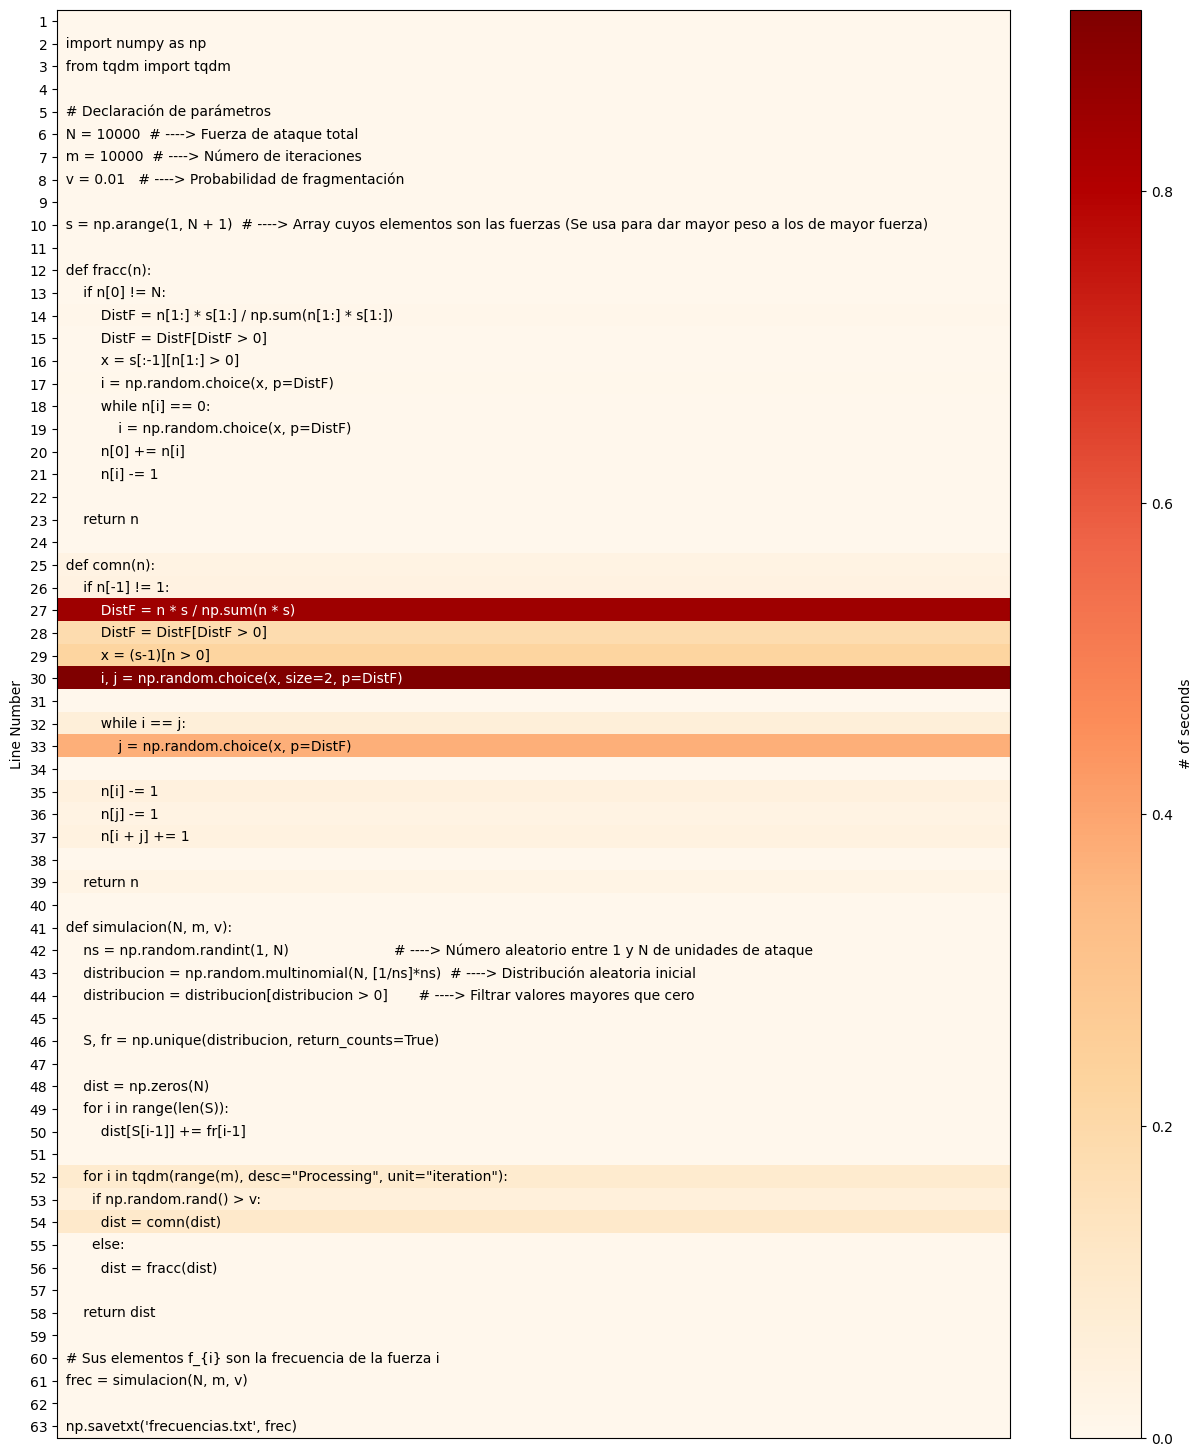

In [ ]:
%%heat -o Profiling2.png

import numpy as np
from tqdm import tqdm

# Declaración de parámetros
N = 10000  # ----> Fuerza de ataque total
m = 10000  # ----> Número de iteraciones
v = 0.01   # ----> Probabilidad de fragmentación

s = np.arange(1, N + 1)  # ----> Array cuyos elementos son las fuerzas (Se usa para dar mayor peso a los de mayor fuerza)

# Función de fraccionamiento
def fracc(n):
    if n[0] != N:                                     # ----> Comprueba que el primer elemento de n sea diferente de N
        DistF = n[1:] * s[1:] / np.sum(n[1:] * s[1:]) # ----> Distribución de probabilidad de fuerzas
        DistF = DistF[DistF > 0]                      # ----> Filtra valores mayores que 0
        x = s[:-1][n[1:] > 0]                         # ----> Selecciona elementos del array mayores que 0
        i = np.random.choice(x, p=DistF)              # ----> Escoge un frente basado en la ponderación
        while n[i] == 0:                              # ----> Comprueba si el índice es igual a 0
            i = np.random.choice(x, p=DistF)          # ----> Si la condición se cumple se repite la selección aleatoria
        n[0] += n[i]                                  # ----> Se suma el primer elemento de n con el indice seleccionado
        n[i] -= 1                                     # ----> El valor de n decrece en 1

    return n

# Función de combinación
def comn(n):
    if n[-1] != 1:                                     # ----> Comprueba si el último elemento es diferente de 1
        DistF = n * s / np.sum(n * s)                  # ----> Distribución de probabilidad de fuerzas
        DistF = DistF[DistF > 0]                       # ----> Filtra valores mayores que 0
        x = (s-1)[n > 0]                               # ----> Filtra valores mayores que 0
        i, j = np.random.choice(x, size=2, p=DistF)    # ----> Escoge dos frentes basados en la ponderación

        while i == j:
            j = np.random.choice(x, p=DistF)          # ----> Asegurarse que i y j sean distintos

        n[i] -= 1                                     # ---->  El valor de i decrece en 1
        n[j] -= 1                                     # ---->  El valor de j decrece en 1
        n[i + j] += 1                                 # ---->  El valor de la posición i + j aumenta en 1

    return n

# Función
def simulacion(N, m, v):
    ns = np.random.randint(1, N)                        # ----> Número aleatorio entre 1 y N de unidades de ataque
    distribucion = np.random.multinomial(N, [1/ns]*ns)  # ----> Distribución aleatoria inicial
    distribucion = distribucion[distribucion > 0]       # ----> Filtrar valores mayores que cero

    S, fr = np.unique(distribucion, return_counts=True) # ----> Obtiene valores únicos de la distribución y sus frecuencias

    dist = np.zeros(N)                                  # ----> Se genera un array de 0's de tamaño N
    for i in range(len(S)):
        dist[S[i-1]] += fr[i-1]                         # ----> Asignación de frecuencias en el array

    for i in tqdm(range(m), desc="Processing", unit="iteration"):
      if np.random.rand() > v:                          # ----> Genera un número aleatorio entre 0 y 1 mayor que v
        dist = comn(dist)                               # ----> Si se cumple la condición la unidad se combina
      else:
        dist = fracc(dist)                              # ----> Si no se cumple la condición la unidad se fracciona

    return dist

# Sus elementos f_{i} son la frecuencia de la fuerza i
frec = simulacion(N, m, v)

np.savetxt('frecuencias.txt', frec)

### Graficación

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

frec = np.loadtxt('frecuencias.txt') # ----> Carga el archivo txt generado
N = len(frec)                        # ----> Número de elementos del array

s = np.arange(1, N + 1)[frec > 0]
fig, ax = plt.subplots()
ax.scatter(s, frec[frec > 0])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Fuerza de ataque')
ax.set_ylabel('Frecuencia')
plt.show()